## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [203]:
df = pd.read_csv("QueryResults.csv", names=['Date', 'TagName', 'Qtd'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [204]:
df.head()
df.tail()

,Date,TagName,Qtd
2602,2024-03-01 00:00:00,perl,52
2603,2024-03-01 00:00:00,python,8419
2604,2024-03-01 00:00:00,c,797
2605,2024-03-01 00:00:00,javascript,5336
2606,2024-03-01 00:00:00,swift,814


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [205]:
df.shape

(2607, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [206]:
df.count()

Date       2607
TagName    2607
Qtd        2607
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [207]:
df.groupby("TagName")["Qtd"].sum()

TagName
assembly        44183
c              403716
c#            1614222
c++            806193
delphi          51826
go              72738
java          1916133
javascript    2527095
perl            68090
php           1463888
python        2189582
r              505145
ruby           229005
swift          333197
Name: Qtd, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [208]:
df.groupby("TagName")["Qtd"].count()

TagName
assembly      188
c             188
c#            189
c++           188
delphi        188
go            173
java          188
javascript    188
perl          188
php           188
python        188
r             186
ruby          188
swift         179
Name: Qtd, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [209]:
df.Date = pd.to_datetime(df["Date"])
df

,Date,TagName,Qtd
0,2008-07-01,c#,3
1,2008-08-01,javascript,163
2,2008-08-01,perl,28
3,2008-08-01,c#,504
4,2008-08-01,delphi,13
...,...,...,...
2602,2024-03-01,perl,52
2603,2024-03-01,python,8419
2604,2024-03-01,c,797
2605,2024-03-01,javascript,5336


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [210]:
df.shape

(2607, 3)

In [211]:
df.columns

Index(['Date', 'TagName', 'Qtd'], dtype='object')

In [212]:
df.head()

,Date,TagName,Qtd
0,2008-07-01,c#,3
1,2008-08-01,javascript,163
2,2008-08-01,perl,28
3,2008-08-01,c#,504
4,2008-08-01,delphi,13


In [213]:
reshaped_df = df.pivot_table(index="Date", columns="TagName", values="Qtd")
reshaped_df

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,13.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1148.0,722.0,128.0,604.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,172.0,958.0,3105.0,1466.0,103.0,408.0,3273.0,5183.0,44.0,1397.0,8450.0,1991.0,153.0,864.0
2023-12-01,181.0,876.0,2645.0,1428.0,75.0,326.0,2536.0,4762.0,53.0,1207.0,6993.0,1602.0,154.0,740.0
2024-01-01,176.0,825.0,2685.0,1579.0,89.0,345.0,2864.0,5128.0,34.0,1400.0,7756.0,1807.0,163.0,867.0


In [214]:
reshaped_df.shape

(189, 14)

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [215]:
reshaped_df.count()

TagName
assembly      188
c             188
c#            189
c++           188
delphi        188
go            173
java          188
javascript    188
perl          188
php           188
python        188
r             186
ruby          188
swift         179
dtype: int64

In [216]:
reshaped_df.fillna(0, inplace=True)
reshaped_df

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,13.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1148.0,722.0,128.0,604.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,497.0,448.0,1.0,157.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,172.0,958.0,3105.0,1466.0,103.0,408.0,3273.0,5183.0,44.0,1397.0,8450.0,1991.0,153.0,864.0
2023-12-01,181.0,876.0,2645.0,1428.0,75.0,326.0,2536.0,4762.0,53.0,1207.0,6993.0,1602.0,154.0,740.0
2024-01-01,176.0,825.0,2685.0,1579.0,89.0,345.0,2864.0,5128.0,34.0,1400.0,7756.0,1807.0,163.0,867.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

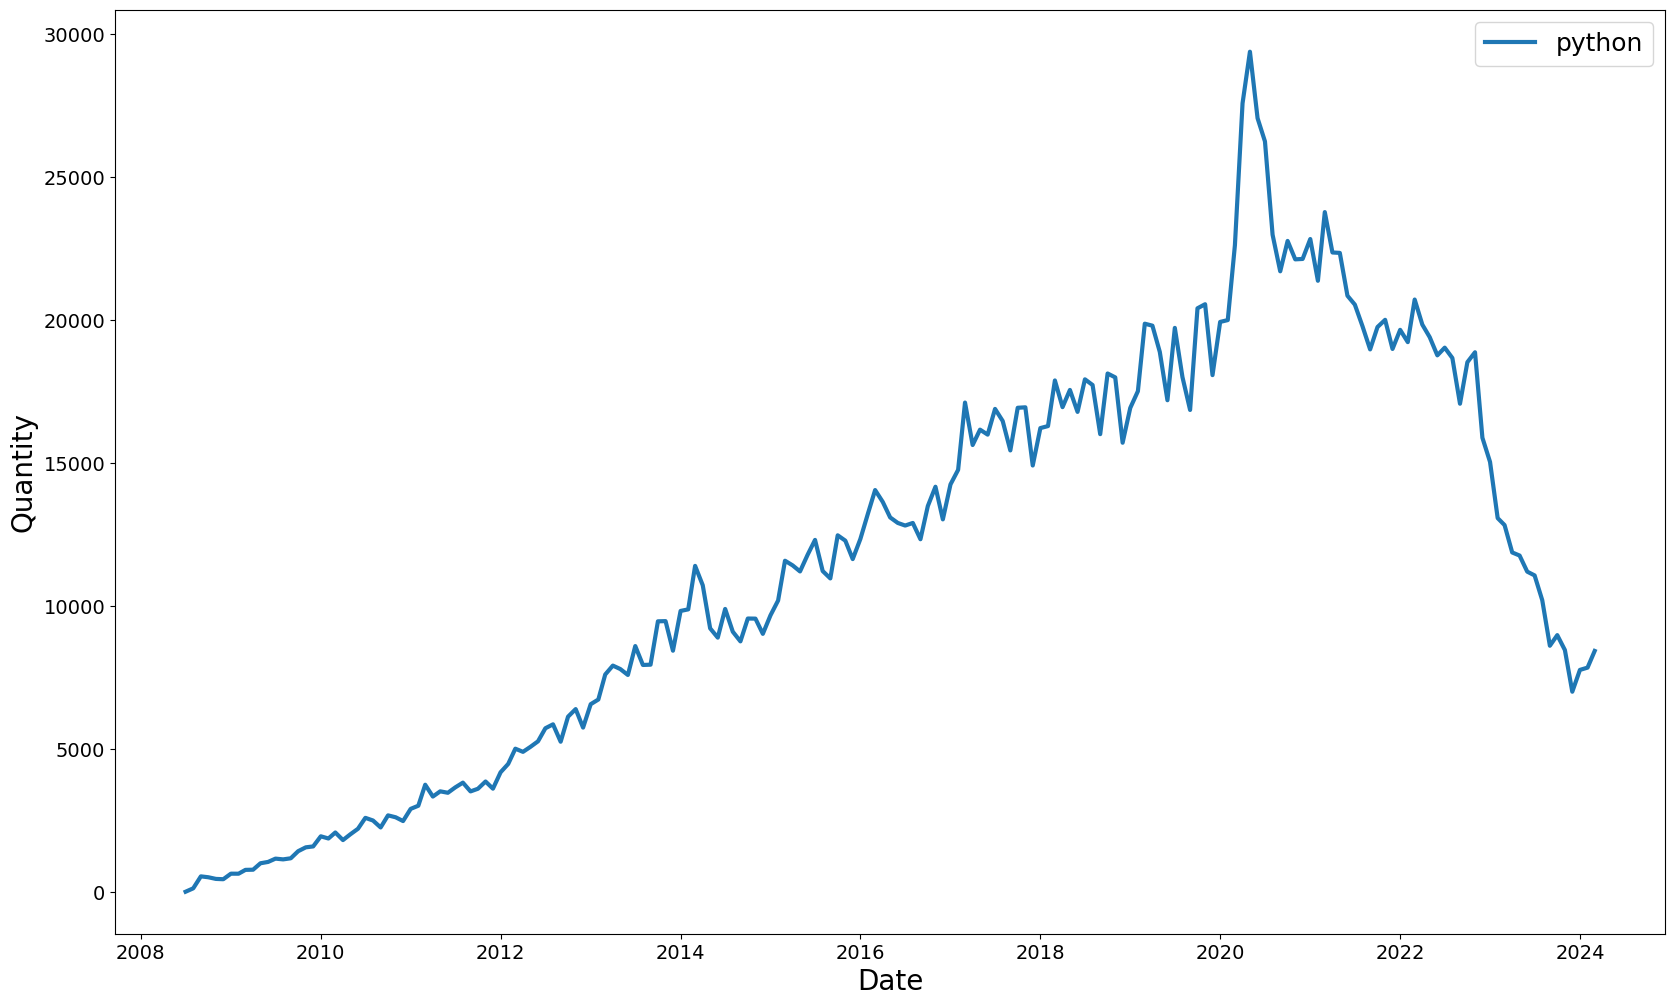

In [226]:
plt.figure(figsize=(20,12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Quantity", fontsize=20)
plt.plot(reshaped_df.index, reshaped_df["python"], linewidth=3, label=reshaped_df["python"].name)
plt.legend(loc="best", fontsize=18)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

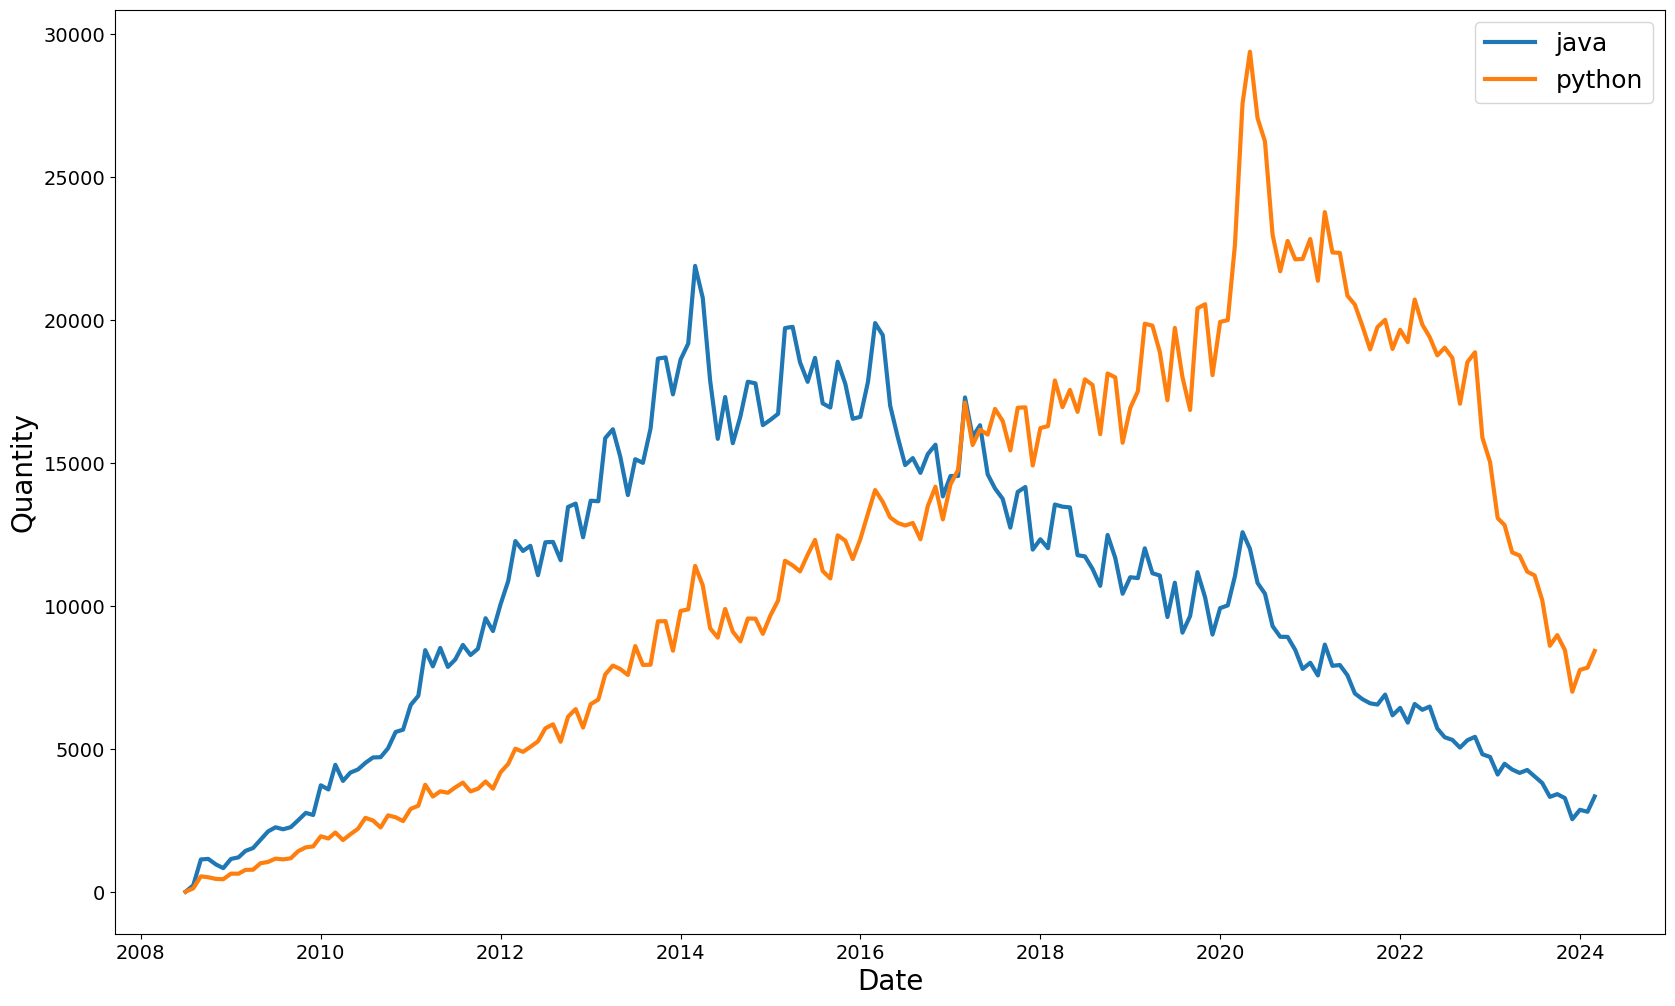

In [227]:
plt.figure(figsize=(20,12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Quantity", fontsize=20)
plt.plot(reshaped_df.index, reshaped_df["java"], linewidth=3, label=reshaped_df["java"].name)
plt.plot(reshaped_df.index, reshaped_df["python"], linewidth=3, label=reshaped_df["python"].name)
plt.legend(loc="best", fontsize=18)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [243]:
roll_df = reshaped_df.rolling(window=12).mean()

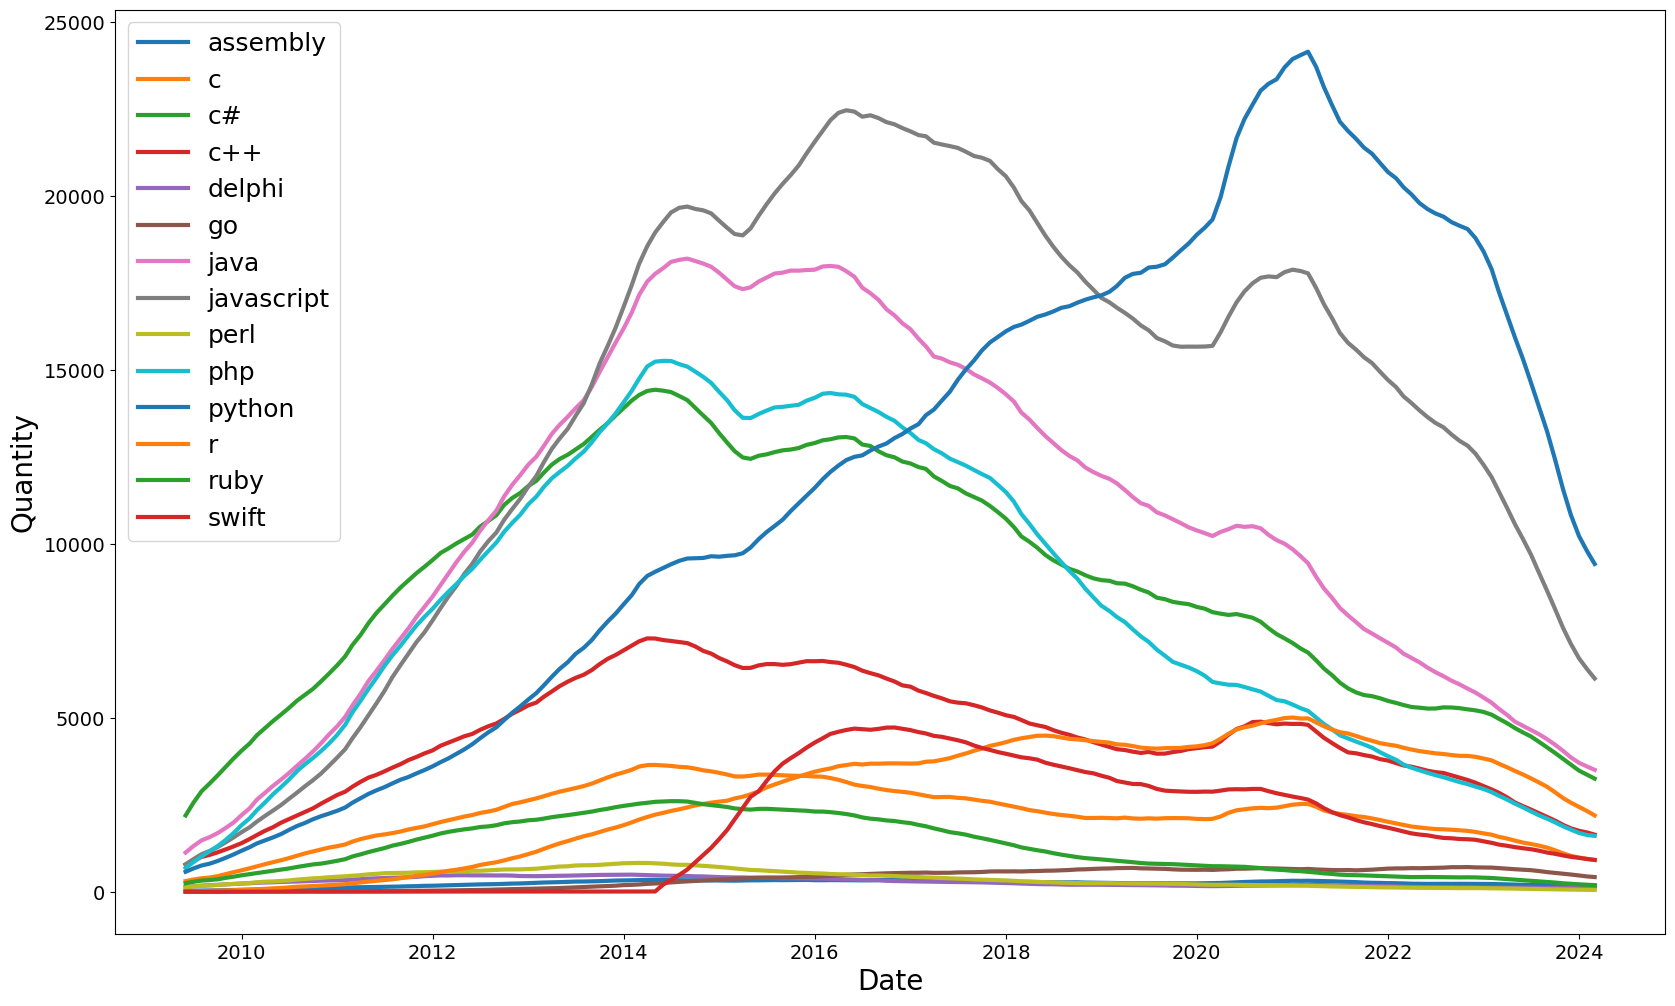

In [244]:
plt.figure(figsize=(20,12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Quantity", fontsize=20)
plt.plot(roll_df.index, roll_df, linewidth=3, label=roll_df.columns)
plt.legend(loc="best", fontsize=18)